# Ejemplo de lectura de archivo csv

Utiliso la bibliotecas os que me da acceso al sistema de archivos y otras cosas propias del sistema operativo (de ahí **os**).
Por otra parte, la biblioteca Pandas ofrece un montón de cosas para el procesamiento de datos desde su manejo hasta su análisis. Una cosa que es muy útil es lo que se llama *autocompletion*, que es una ayuda para recordar que posibilidades u opciones tengo para usar un comando dado. Lo uso con la tecla **tab**. Esta característica es dependiente del tipo de objeto que se trate, así que se requiere que ese objeto ya exista, es decir que la "celda" en donde se crea ya haya sido ejecutada previamente.

In [7]:
import os
import pandas as pd

## lectura de datos

Primero selecciono el directorio en donde tengo los datos. Básicamente es el directorio que usaré para trabajar y pondré aquí también los resultados del procesamiento. Guardo en una lista *archivos* el contenido de la carpeta que seleccione para trabajar con la función *chdir*. Al dar el nombre de la lista le indico a Python que muestre su contenido, que es el resultado que aparece en seguida.

In [8]:
os.chdir("C:/Users/OPT9030-GBB/Documents/Versiones/Ecoacustics_MX/Tareas aprendizaje/004 Gráficas con ggplot2 y Matplotlib")
archivos = os.listdir()
archivos

['.ipynb_checkpoints',
 'algo.txt',
 'Datos_PTC_10spp_Ranas.csv',
 'Ejemplo lectura CSV.ipynb',
 'exercise4_ggplot.Rmd']

### Resultados de la lectura del archivo csv

Mediante la función *read_csv_ de pandas leo el archivo **csv** que me interesa. Una cosa interesante es que como guardé el directorio de la carpeta en la variable *archivos*, puedo usarla para recuperar el nombre que me interesa. La lista está ordenada y sus elementos pueden ser referidos por número de localización (empezando con 0!!!). En este caso uso *archivo[0] para leer "*algo.txt*" y lo despliego siplemente invocando su nombre.

In [9]:
datos = pd.read_csv(archivos[1])
datos

,uno,dos
0,1.1,2.1
1,1.2,2.2
2,1.3,2.3


### Archivo de ranas

Dado que estas usando palabras acentuadas, es necesario especificar el sistema de codificación de los caracteres en tu archivo. Por lo tanto, en este caso, es indispensable decirle a Python cual es el sistema de codificación que permite interpretar con eactitud el contenido del archivo. El sistema de codificación de windows suele ser una variante del **iso-8859-1**, puedes probar con él o si no con **latin1**, que aplica cuando estás usando caractreses acentuados en alfabeto latino.


In [10]:
ranas = pd.read_csv(archivos[2], encoding = 'latin1')
ranas

,No.,Familia,Especie,No_individuos,Longitud_media_mm,Peso_promedio_gr,Color_dominante
0,1,Hylidae,C. taeniopus,8,9.494,48.94,Verde oscuro
1,2,Craugastoridae,C. decoratus,1,2.500,30.00,Café
2,3,Craugastoridae,C. rhodopis,97,1.836,23.84,Café oscuro
3,4,Craugastoridae,C. pygmaeus,3,0.300,13.88,Café medio
4,5,Hylidae,E. miotympanum,104,1.330,26.68,Verde claro
5,6,Eleutherodactylidae,E. cystignathoides,10,0.660,19.25,Gris
6,7,Centrolenidae,H. fleischmanni,8,0.731,23.83,Verde limón
7,8,Bufonidae,I. valliceps,1,13.500,50.20,Café claro
8,9,Ranidae,L. berlandieri,1,3.500,32.00,Verde
9,10,Hylidae,P. arborescandens,27,2.767,32.44,Dorado


In [11]:
import matplotlib as mpl
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
ranas.columns[1]

'Familia'

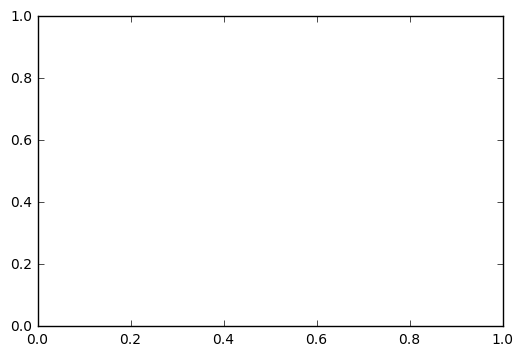

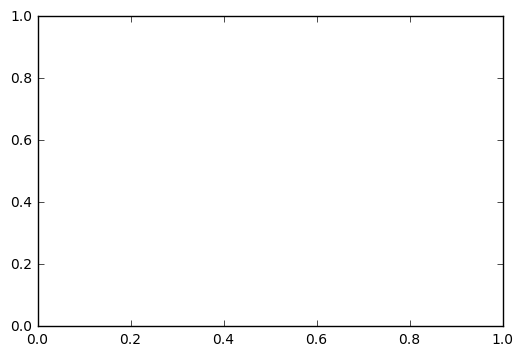

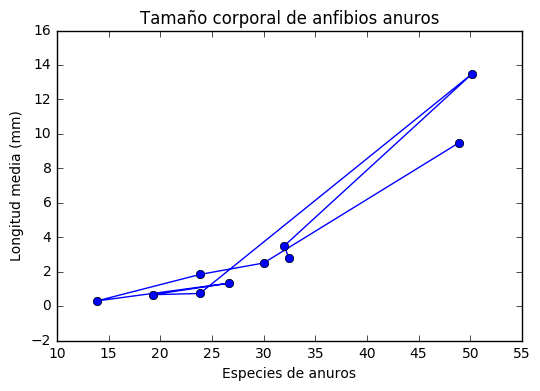

In [15]:
X = ranas.Peso_promedio_gr
Y = ranas.Longitud_media_mm

plt.plot(X, Y, marker='o')
plt.show()